In [64]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('/content/fake_news_cleaned.csv')

In [65]:
#Few rows of the dataset to understand the data
df.head()

,text,label,processed_text,cleaned_text
0,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...,comment expected barack obama members fyf911 <...
1,Did they post their votes for Hillary already?,1,did they post their votes for hillary already?,post votes hillary
2,"Now, most of the demonstrators gathered last ...",1,"now, most of the demonstrators gathered last ...",demonstrators gathered <TIME> exercising con...
3,A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...,<CARDINAL> politically active pastors came pri...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"the rs-28 sarmat missile, dubbed satan 2, will...",<ORG> sarmat missile dubbed satan <CARDINAL> r...


In [66]:
#importing the feature engineering libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
#formatting the text column to string
df['cleaned_text'] = df['cleaned_text'].astype(str)

In [68]:
#tokenizing the text column
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

In [69]:
#sequencing and padding the text column
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_text = pad_sequences(sequences,maxlen = 200, padding='post', truncating='post')

print(padded_text.shape)

(62718, 200)


In [70]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

labels = df['label'].values

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(padded_text, labels, test_size=0.2, random_state=42)


In [71]:
#printing the shape of the data
print('the shape of X_train:',X_train.shape)
print('the shape of y_train:',y_train.shape)


the shape of X_train: (50174, 200)
the shape of y_train: (50174,)


In [72]:
#Building the model an Bidirectional LSTM model with Dropout Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=256, input_length=200,kernel_regularizer=l2(0.01)))  # Embedding layer
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Bidirectional LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Bidirectional(LSTM(64)))  # Another Bidirectional LSTM layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])



In [73]:
#Training the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)


Epoch 1/10
392/392 - 626s - loss: 0.2182 - accuracy: 0.9100 - val_loss: 0.1354 - val_accuracy: 0.9490 - 626s/epoch - 2s/step
Epoch 2/10
392/392 - 656s - loss: 0.0874 - accuracy: 0.9700 - val_loss: 0.1155 - val_accuracy: 0.9574 - 656s/epoch - 2s/step
Epoch 3/10
392/392 - 652s - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.1358 - val_accuracy: 0.9555 - 652s/epoch - 2s/step
Epoch 4/10
392/392 - 626s - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.1446 - val_accuracy: 0.9542 - 626s/epoch - 2s/step
Epoch 5/10
392/392 - 668s - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.1686 - val_accuracy: 0.9586 - 668s/epoch - 2s/step
Epoch 6/10
392/392 - 663s - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.2514 - val_accuracy: 0.9440 - 663s/epoch - 2s/step
Epoch 7/10
392/392 - 622s - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.1975 - val_accuracy: 0.9508 - 622s/epoch - 2s/step
Epoch 8/10
392/392 - 666s - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.1698 - val_accuracy: 0.9566 - 666s/epoch - 2s/step


In [74]:
#Evaluating the Model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions



392/392 [==============================] - 50s 113ms/step


In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9551179846938775


In [75]:
#classification score
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6922
           1       0.94      0.96      0.95      5622

    accuracy                           0.96     12544
   macro avg       0.95      0.96      0.95     12544
weighted avg       0.96      0.96      0.96     12544



<Axes: >

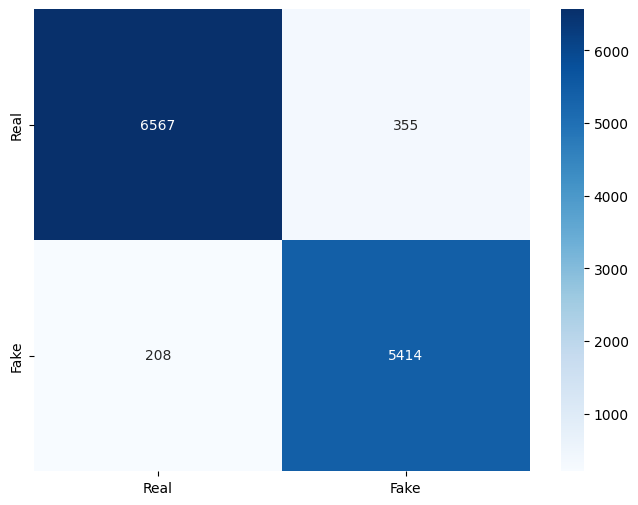

In [76]:
#applying the confusion matrix to visualize the evaluation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])

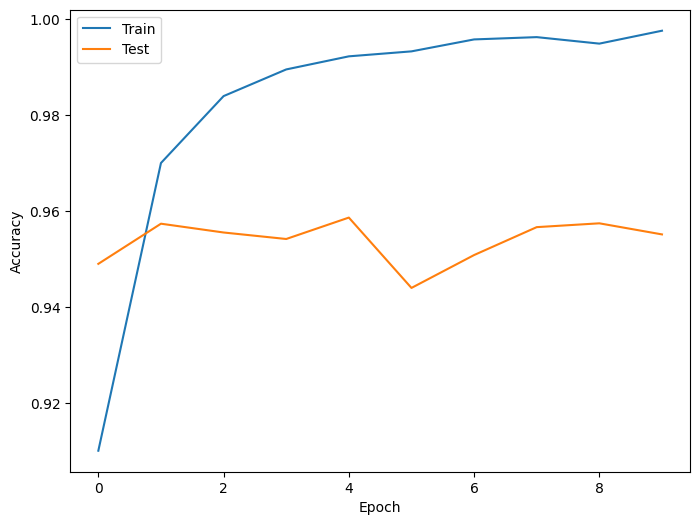

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

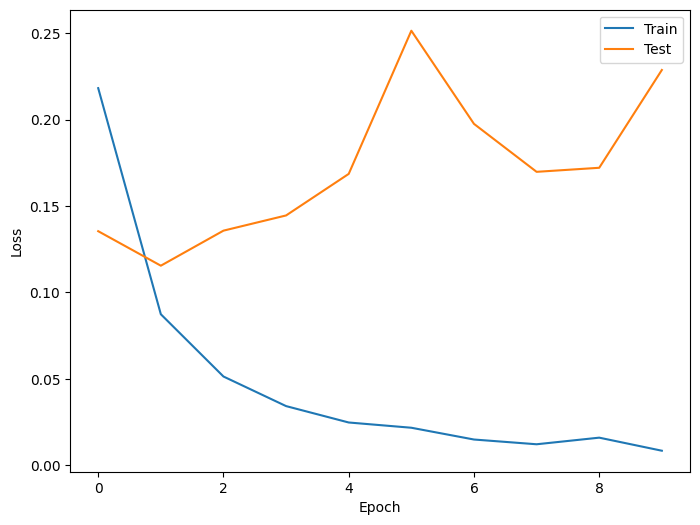

In [85]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

In [77]:
#Saving the model
model.save('fake_news_classifier_bidir_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
